# Loading and correcting data for RhFe 
# NanoLab experiments

In [1]:
%load_ext autoreload
%autoreload 2
%gui tk

In [2]:
#Imports
# Embedded imports
import os, sys
import copy
import math
import matplotlib.pyplot as plt
# Third party imports
import numpy as np
import pandas as pd
import scipy as sp
# Temporary solution for local imports
sys.path.append('..')
from xpstool import helpers 
from xpstool import Experiment, Spectrum, Region
from xpstool import Fitter

In [3]:
# ---SPECS DATA FOLDERS---
# Full path to data files
data_folder = "/Users/Shipilin/Documents/07_DataAnalysis/2018-RhFe_alloys/2018-November_Rh80Fe20/2018-11_Rh80Fe20_XPS/XY_RhFe"
data_subfolders = [
    "/Rh80Fe20(111)",
    "/Rh80Fe20(111)_7_11",
    "/Rh80Fe20(111)_8_11",
    "/Rh80Fe20(111)_9_11"
]
# Full path to output files
output_folder = "/Users/Shipilin/Documents/07_DataAnalysis/2018-RhFe_alloys/2018-November_Rh80Fe20/2018-11_Rh80Fe20_XPS/ProcessedData"

file_names = []
file_paths = []
file_idx = 0
for subfolder in data_subfolders:
    files = os.listdir("".join([data_folder, subfolder]))
    files = sorted(files, key=lambda x: int(x.rpartition('.')[0].rpartition('_')[2]))
    for file in files:
        if file.endswith(".xy"): 
            file_names.append(file)
            file_paths.append("/".join(["".join([data_folder, subfolder]), file]))
            #print(f"---> file[{file_idx}]: {file}")
            file_idx += 1

In [4]:
# Loading all spectra to a list
all_spectra = []
for path in file_paths:
    all_spectra.append(Spectrum(path=path, file_type="specs"))
       
print(f"{len(all_spectra)} spectra were loaded successfuly.")

# Check for spectra that are empty or contain more than one region
for spectrum in all_spectra:
    if spectrum.isEmpty():
        print(f"{spectrum.getID()} spectrum: 0 regions")
    if len(spectrum.getRegions()) > 1:
        print(f"{spectrum.getID()} spectrum: {len(spectrum.getRegions())} regions")

224 spectra were loaded successfuly.
Rh80Fe20(111)_3 spectrum: 0 regions
Rh80Fe20(111)_7_11_1 spectrum: 0 regions
Rh80Fe20(111)_7_11_2 spectrum: 0 regions
Rh80Fe20(111)_7_11_3 spectrum: 0 regions
Rh80Fe20(111)_7_11_60 spectrum: 0 regions
Rh80Fe20(111)_8_11_1 spectrum: 0 regions
Rh80Fe20(111)_8_11_2 spectrum: 0 regions
Rh80Fe20(111)_8_11_3 spectrum: 0 regions
Rh80Fe20(111)_9_11_1 spectrum: 0 regions
Rh80Fe20(111)_9_11_2 spectrum: 0 regions
Rh80Fe20(111)_9_11_3 spectrum: 0 regions
Rh80Fe20(111)_9_11_48 spectrum: 0 regions
Rh80Fe20(111)_9_11_49 spectrum: 0 regions
Rh80Fe20(111)_9_11_50 spectrum: 0 regions
Rh80Fe20(111)_9_11_51 spectrum: 0 regions
Rh80Fe20(111)_9_11_52 spectrum: 0 regions


In [5]:
for spectrum in all_spectra:
    if not spectrum.isEmpty():
        print(spectrum.getID())
        print(f"--->{spectrum.getRegion().getID()}")

Rh80Fe20(111)_1
--->Rh80Fe20(111)_1:Rh3d align (NE)
Rh80Fe20(111)_2
--->Rh80Fe20(111)_2:Rh3d align (GE)
Rh80Fe20(111)_4
--->Rh80Fe20(111)_4:survey
Rh80Fe20(111)_5
--->Rh80Fe20(111)_5:Survey after 2 cleaning cycles
Rh80Fe20(111)_6
--->Rh80Fe20(111)_6:Fe 2p  after 2 cleaning cycles
Rh80Fe20(111)_7
--->Rh80Fe20(111)_7:Rh 3d  after 2 cleaning cycles
Rh80Fe20(111)_8
--->Rh80Fe20(111)_8:C 1s  after 2 cleaning cycles
Rh80Fe20(111)_9
--->Rh80Fe20(111)_9:O 1S + Rh 3P  after 2 cleaning cycles
Rh80Fe20(111)_10
--->Rh80Fe20(111)_10:EF after 2 cleaning cycles
Rh80Fe20(111)_11
--->Rh80Fe20(111)_11:Survey after 2 cleaning cycles (spot 2)
Rh80Fe20(111)_12
--->Rh80Fe20(111)_12:Survey after 2 cleaning cycles (spot 1) (with window open...)
Rh80Fe20(111)_13
--->Rh80Fe20(111)_13:Survey after 2 cleaning cycles (spot 3)
Rh80Fe20(111)_14
--->Rh80Fe20(111)_14:survey (300C)
Rh80Fe20(111)_15
--->Rh80Fe20(111)_15:Fe 2p  300C
Rh80Fe20(111)_16
--->Rh80Fe20(111)_16:Rh 3d  300C
Rh80Fe20(111)_17
--->Rh80Fe20(111)_17:C

### Experiment's log 
**Folder Rh80Fe20(111)**<br>
The sample was heated to about 900 K in vacuum during one hour time.
-  all_spectra[3] ---> Rh80Fe20(111)_4:survey

Two cycles of sputtering (1 kV, 5E-6 mbar Ar, 6 mA emission, 20 minutes) <br> 
and annealing (600V, 2.2A, 78-60mA, 5minutes. ~ 900K) <br>
***
Data Set #1: Clean surface, Normal emission, Room temperature
-  all_spectra[4] ---> Rh80Fe20(111)_5:survey
-  all_spectra[5] ---> Rh80Fe20(111)_6:Fe2p NE
-  all_spectra[6] ---> Rh80Fe20(111)_7:Rh3d NE
-  all_spectra[7] ---> Rh80Fe20(111)_8:C1s NE
-  all_spectra[8] ---> Rh80Fe20(111)_9:O1s(+Rh3p) NE
-  all_spectra[9] ---> Rh80Fe20(111)_10:Ef NE
-  all_spectra[10] ---> Rh80Fe20(111)_11:Survey (Spot #2) NE
***
#### NOTE: Analyser window was closed until now. Following scans have higher intensity due to open window
Checking for the surface homogenity:
-  all_spectra[11] ---> Rh80Fe20(111)_12:Survey (Spot #1) NE
-  all_spectra[12] ---> Rh80Fe20(111)_13:Survey (Spot #3) NE

All surveys look pretty much the same, so, thesample surface seems to be homogeneous <br>
***
Data Set #2: Clean surface, Normal Emission, 300C
-  all_spectra[13] ---> Rh80Fe20(111)_14:Survey 300C NE
-  all_spectra[14] ---> Rh80Fe20(111)_15:Fe2p 300C NE
-  all_spectra[15] ---> Rh80Fe20(111)_16:Rh3d 300C NE
-  all_spectra[16] ---> Rh80Fe20(111)_17:C1s 300C NE
-  all_spectra[17] ---> Rh80Fe20(111)_18:O1s(+Rh3p) 300C NE
-  all_spectra[18] ---> Rh80Fe20(111)_19:Ef 300C NE
***
Data Set #3: Clean surface, Grazing Emission, Room temperature
-  all_spectra[19] ---> Rh80Fe20(111)_20:Survey GE
-  all_spectra[20] ---> Rh80Fe20(111)_21:Fe2p GE
-  all_spectra[21] ---> Rh80Fe20(111)_22:Rh3d GE
-  all_spectra[22] ---> Rh80Fe20(111)_23:C1s GE
-  all_spectra[23] ---> Rh80Fe20(111)_24:O1s(+Rh3p) GE
-  all_spectra[24] ---> Rh80Fe20(111)_25:Ef GE
***
Data Set #4: Clean surface, Grazing Emission, 300C
-  all_spectra[25] ---> Rh80Fe20(111)_26:Survey 300C GE
-  all_spectra[26] ---> Rh80Fe20(111)_27:Fe2p 300C GE
-  all_spectra[27] ---> Rh80Fe20(111)_28:Rh3d 300C GE
-  all_spectra[28] ---> Rh80Fe20(111)_29:C1s 300C GE
-  all_spectra[29] ---> Rh80Fe20(111)_30:O1s(+Rh3p) 300C GE
-  all_spectra[30] ---> Rh80Fe20(111)_31:Ef 300C GE
***
**Folder Rh80Fe20(111)\_7\_11**<br>
Two cycles of sputtering (1 kV, 5E-6 mbar Ar, 6 mA emission, 20 minutes) <br> 
and annealing (600V, 2.2A, 78-60mA, 5minutes. ~ 900K) <br>
Cooling down to Liquid Nitrogen temperature. <br>
<br>
Taking spectra upon cooling to check water formation and such:
-  all_spectra[34] ---> Rh80Fe20(111)\_7\_11\_4:Survey NE (cooling start from 650K)
-  all_spectra[35] ---> Rh80Fe20(111)\_7\_11\_5:O1s(+Rh3p) NE (cooling start from 650K)
-  all_spectra[36] ---> Rh80Fe20(111)\_7\_11\_6:Fe2p NE (cooling start from 650K)
-  all_spectra[37] ---> Rh80Fe20(111)\_7\_11\_7:Ef NE (cooling start from 650K)
***
Data Set #5: Clean surface, Normal Emission, 96K (Liquid Nitrogen)
-  all_spectra[38] ---> Rh80Fe20(111)\_7\_11\_8:Survey 96K NE 
-  all_spectra[39] ---> Rh80Fe20(111)\_7\_11\_9:Fe2p 96K NE 
-  all_spectra[40] ---> Rh80Fe20(111)\_7\_11\_10:Rh3d 96K NE 
-  all_spectra[41] ---> Rh80Fe20(111)\_7\_11\_11:C1s 96K NE 
-  all_spectra[42] ---> Rh80Fe20(111)\_7\_11\_12:O1s(+Rh3p) 96K NE 
-  all_spectra[43] ---> Rh80Fe20(111)\_7\_11\_13:Ef 96K NE 
***
Checking for water
-  all_spectra[44] ---> Rh80Fe20(111)\_7\_11\_14:O1s(+Rh3p) 96K NE
***
Data Set #6: Clean surface, Grazing Emission, 96K (Liquid Nitrogen)
-  all_spectra[45] ---> Rh80Fe20(111)\_7\_11\_15:Survey 96K GE 
-  all_spectra[46] ---> Rh80Fe20(111)\_7\_11\_16:Fe2p 96K GE 
-  all_spectra[47] ---> Rh80Fe20(111)\_7\_11\_17:Rh3d 96K GE 
-  all_spectra[48] ---> Rh80Fe20(111)\_7\_11\_18:C1s 96K GE 
-  all_spectra[49] ---> Rh80Fe20(111)\_7\_11\_19:O1s(+Rh3p) 96K GE <font color=red>(NOTE: Prominent feature)</font>
-  all_spectra[50] ---> Rh80Fe20(111)\_7\_11\_20:Ef 96K GE 

Reoptimized position:
-  all_spectra[51] ---> Rh80Fe20(111)\_7\_11\_21:Survey 96K GE
-  all_spectra[52] ---> Rh80Fe20(111)\_7\_11\_22:O1s(+Rh3p) 96K GE 
-  all_spectra[53] ---> Rh80Fe20(111)\_7\_11\_23:Ef 96K GE
***
Data Set #7: Clean surface, Normal Emission, 700C
-  all_spectra[54] ---> Rh80Fe20(111)\_7\_11\_24:Survey 700C NE 
-  all_spectra[55] ---> Rh80Fe20(111)\_7\_11\_25:Fe2p 700C NE 
-  all_spectra[56] ---> Rh80Fe20(111)\_7\_11\_26:Rh3d 700C NE 
-  all_spectra[57] ---> Rh80Fe20(111)\_7\_11\_27:C1s 700C NE 
-  all_spectra[58] ---> Rh80Fe20(111)\_7\_11\_28:O1s(+Rh3p) 700C NE 
-  all_spectra[59] ---> Rh80Fe20(111)\_7\_11\_29:Ef 700C NE 
***
In Grazing Emission position at elevated pressures high binding energy tail of survey scans is elevated by some background contribution.
-  all_spectra[60] ---> Rh80Fe20(111)\_7\_11\_30:Survey 700C NE 
-  all_spectra[61] ---> Rh80Fe20(111)\_7\_11\_31:Survey 700C GE 
Additionally, in Grazing Emission there is a big peak around 890 eV binding energy, which disappears when the e-beam heater is off. Some weird behavior, but not related to surface contaminations.
-  all_spectra[67] ---> Rh80Fe20(111)\_7\_11\_37:Survey around 890 eV 700C GE (Heater ON) 
-  all_spectra[68] ---> Rh80Fe20(111)\_7\_11\_38:Survey around 890 eV 700C GE  (Heater OFF)
***
Data Set #8: Clean surface, Grazing Emission, 700C
-  all_spectra[61] ---> Rh80Fe20(111)\_7\_11\_31:Survey 700C GE 
-  all_spectra[62] ---> Rh80Fe20(111)\_7\_11\_32:Fe2p 700C GE 
-  all_spectra[63] ---> Rh80Fe20(111)\_7\_11\_33:O1s(+Rh3p) 700C GE 
-  all_spectra[64] ---> Rh80Fe20(111)\_7\_11\_34:Rh3d 700C GE 
-  all_spectra[65] ---> Rh80Fe20(111)\_7\_11\_35:C1s 700C GE 
-  all_spectra[66] ---> Rh80Fe20(111)\_7\_11\_36:Ef 700C GE 
***
Cool the sample down and dose 10L CO (2E-7 mbar CO for 1 min).
***
Data Set #9: 10L CO at 97K, Grazing Emission
-  all_spectra[69] ---> Rh80Fe20(111)\_7\_11\_39:Survey 97K CO:10L GE 
-  all_spectra[70] ---> Rh80Fe20(111)\_7\_11\_40:C1s 97K CO:10L GE
-  all_spectra[71] ---> Rh80Fe20(111)\_7\_11\_41:Fe2p 97K CO:10L GE 
-  all_spectra[72] ---> Rh80Fe20(111)\_7\_11\_42:O1s(+Rh3p) 97K CO:10L GE
-  all_spectra[73] ---> Rh80Fe20(111)\_7\_11\_43:Rh3d CO:10L 97K GE
-  all_spectra[74] ---> Rh80Fe20(111)\_7\_11\_44:Ef 97K CO:10L GE

Checking the beamdamage:
-  all_spectra[70] ---> Rh80Fe20(111)\_7\_11\_40:C1s 97K CO:10L GE (before set) 
-  all_spectra[75] ---> Rh80Fe20(111)\_7\_11\_45:C1s 97K CO:10L GE (after set)
***
<font color=red>Add-dimension scan upon heating following CO desorption</font>
-  all_spectra[76] ---> Rh80Fe20(111)\_7\_11\_46:C1s 97K CO:10L GE
***
Data Set #10: Surface after CO desorption, 230C, Grazing Emission
-  all_spectra[78] ---> Rh80Fe20(111)\_7\_11\_39:Survey 230C GE 
-  all_spectra[79] ---> Rh80Fe20(111)\_7\_11\_49:C1s 230C GE
-  all_spectra[80] ---> Rh80Fe20(111)\_7\_11\_50:Fe2p 230C GE 
-  all_spectra[81] ---> Rh80Fe20(111)\_7\_11\_51:O1s(+Rh3p) 230C GE
-  all_spectra[82] ---> Rh80Fe20(111)\_7\_11\_52:Rh3d 230C GE
-  all_spectra[83] ---> Rh80Fe20(111)\_7\_11\_53:Ef 230C GE
***
***
Cool the sample down and dose 10L CO2 (2E-7 mbar CO2 for 1 min).
***
Data Set #11: 10L CO2 at 97K, Grazing Emission
-  all_spectra[84] ---> Rh80Fe20(111)\_7\_11\_54:Survey 97K CO2:10L GE 
-  all_spectra[85] ---> Rh80Fe20(111)\_7\_11\_55:C1s 97K CO2:10L GE
-  all_spectra[86] ---> Rh80Fe20(111)\_7\_11\_56:Fe2p 97K CO2:10L GE 
-  all_spectra[87] ---> Rh80Fe20(111)\_7\_11\_57:O1s(+Rh3p) 97K CO2:10L GE
-  all_spectra[88] ---> Rh80Fe20(111)\_7\_11\_58:Rh3d CO2:10L 97K GE
-  all_spectra[89] ---> Rh80Fe20(111)\_7\_11\_59:Ef 97K CO2:10L GE
***
**Folder Rh80Fe20(111)\_8\_11**<br>
Sputtering (1 kV, 5E-6 mbar Ar, 6 mA emission, 20 minutes) while cooling the sample down<br> 
Flash to 700C <br>
Cool down to Liquid Nitrogen temperature. <br>
Added a short scan of O1s region without Rh3p
***
Data Set #12: Clean surface at 97K, Grazing Emission
-  all_spectra[94] ---> Rh80Fe20(111)\_8\_11\_4:Survey 97K GE 
-  all_spectra[95] ---> Rh80Fe20(111)\_8\_11\_5:O1s 97K GE
-  all_spectra[96] ---> Rh80Fe20(111)\_8\_11\_6:O1s(+Rh3p) 97K GE
-  all_spectra[97] ---> Rh80Fe20(111)\_8\_11\_7:Fe2p 97K GE 
-  all_spectra[98] ---> Rh80Fe20(111)\_8\_11\_8:Rh3d 97K GE
-  all_spectra[99] ---> Rh80Fe20(111)\_8\_11\_9:C1s 97K GE
-  all_spectra[100] ---> Rh80Fe20(111)\_8\_11\_10:Ef 97K GE
***
Dosing CO 50L at 97K (5 min at 2E-7 mbar CO)
Taking few scans of C1s region along with the dosing
-  all_spectra[101] - all_spectra[116] <br>
    ---> Rh80Fe20(111)\_8\_11\_11 - Rh80Fe20(111)\_8\_11\_26:C1s 97K GE <br>
NOTE: Spectra [115] - [116] have 10 sweeps each, while other only 2 <br>
NOTE: Pass energy for spectra [101] - [116] was changed to 40 eV
***
Data Set #13: 50L CO at 97K, Grazing Emission
-  all_spectra[117] ---> Rh80Fe20(111)\_8\_11\_27:Survey 97K CO:50L GE 
-  all_spectra[118] ---> Rh80Fe20(111)\_8\_11\_28:C1s 97K CO:50L GE
<font color=red>Good for comparison:</font>
-  all_spectra[119] ---> Rh80Fe20(111)\_8\_11\_29:01s 97K CO:50L GE
-  all_spectra[120] ---> Rh80Fe20(111)\_8\_11\_30:O1s(+Rh3p) 97K CO:50L GE
-  all_spectra[121] ---> Rh80Fe20(111)\_8\_11\_31:Fe3p CO:50L 97K GE
-  all_spectra[122] ---> Rh80Fe20(111)\_8\_11\_32:Rh3d 97K CO:50L GE
-  all_spectra[123] ---> Rh80Fe20(111)\_8\_11\_33:Ef 97K CO:50L GE
***
Taking several C1s and O1s spectra before starting to heat
-  all_spectra[124] ---> Rh80Fe20(111)\_8\_11\_34:C1s 97K CO:50L GE
-  all_spectra[125] ---> Rh80Fe20(111)\_8\_11\_35:01s 97K CO:50L GE
-  all_spectra[126] ---> Rh80Fe20(111)\_8\_11\_36:C1s 97K CO:50L GE
-  all_spectra[127] ---> Rh80Fe20(111)\_8\_11\_37:01s 97K CO:50L GE
-  all_spectra[128] ---> Rh80Fe20(111)\_8\_11\_38:C1s 97K CO:50L GE
-  all_spectra[129] ---> Rh80Fe20(111)\_8\_11\_39:01s 97K CO:50L GE
-  all_spectra[130] ---> Rh80Fe20(111)\_8\_11\_40:C1s 97K CO:50L GE
-  all_spectra[131] ---> Rh80Fe20(111)\_8\_11\_41:01s 97K CO:50L GE
***
Start heating <br>

<font color=red>110K</font>
-  all_spectra[132] ---> Rh80Fe20(111)\_8\_11\_42:C1s 110K CO:50L GE
-  all_spectra[133] ---> Rh80Fe20(111)\_8\_11\_43:01s 110K CO:50L GE

<font color=red>115K</font>
-  all_spectra[134] ---> Rh80Fe20(111)\_8\_11\_44:C1s 115K CO:50L GE
-  all_spectra[135] ---> Rh80Fe20(111)\_8\_11\_45:01s 115K CO:50L GE

<font color=red>120K</font>
-  all_spectra[136] ---> Rh80Fe20(111)\_8\_11\_46:C1s 120K CO:50L GE
-  all_spectra[137] ---> Rh80Fe20(111)\_8\_11\_47:01s 120K CO:50L GE
-  all_spectra[138] ---> Rh80Fe20(111)\_8\_11\_48:Ef 120K CO:50L GE

<font color=red>125K</font>
-  all_spectra[139] ---> Rh80Fe20(111)\_8\_11\_49:C1s 125K CO:50L GE
-  all_spectra[140] ---> Rh80Fe20(111)\_8\_11\_50:01s 125K CO:50L GE
-  all_spectra[141] ---> Rh80Fe20(111)\_8\_11\_51:Ef 125K CO:50L GE

<font color=red>130K</font>
-  all_spectra[142] ---> Rh80Fe20(111)\_8\_11\_52:C1s 130K CO:50L GE
-  all_spectra[143] ---> Rh80Fe20(111)\_8\_11\_53:01s 130K CO:50L GE
-  all_spectra[144] ---> Rh80Fe20(111)\_8\_11\_54:Ef 130K CO:50L GE

<font color=red>135K</font>
-  all_spectra[145] ---> Rh80Fe20(111)\_8\_11\_55:C1s 135K CO:50L GE
-  all_spectra[146] ---> Rh80Fe20(111)\_8\_11\_56:01s 135K CO:50L GE
-  all_spectra[147] ---> Rh80Fe20(111)\_8\_11\_57:Ef 135K CO:50L GE

<font color=red>140K</font>
-  all_spectra[148] ---> Rh80Fe20(111)\_8\_11\_58:C1s 140K CO:50L GE
-  all_spectra[149] ---> Rh80Fe20(111)\_8\_11\_59:01s 140K CO:50L GE
-  all_spectra[150] ---> Rh80Fe20(111)\_8\_11\_60:Ef 140K CO:50L GE

<font color=red>145K</font>
-  all_spectra[151] ---> Rh80Fe20(111)\_8\_11\_61:C1s 145K CO:50L GE
-  all_spectra[152] ---> Rh80Fe20(111)\_8\_11\_62:01s 145K CO:50L GE
-  all_spectra[153] ---> Rh80Fe20(111)\_8\_11\_63:Ef 145K CO:50L GE

<font color=red>150K</font>
-  all_spectra[154] ---> Rh80Fe20(111)\_8\_11\_64:C1s 150K CO:50L GE
-  all_spectra[155] ---> Rh80Fe20(111)\_8\_11\_65:01s 150K CO:50L GE
-  all_spectra[156] ---> Rh80Fe20(111)\_8\_11\_66:Ef 150K CO:50L GE

<font color=red>155K</font>
-  all_spectra[157] ---> Rh80Fe20(111)\_8\_11\_67:C1s 155K CO:50L GE
-  all_spectra[158] ---> Rh80Fe20(111)\_8\_11\_68:01s 155K CO:50L GE
-  all_spectra[159] ---> Rh80Fe20(111)\_8\_11\_69:Ef 155K CO:50L GE

<font color=red>160K</font>
-  all_spectra[160] ---> Rh80Fe20(111)\_8\_11\_70:C1s 160K CO:50L GE
-  all_spectra[161] ---> Rh80Fe20(111)\_8\_11\_71:01s 160K CO:50L GE
-  all_spectra[162] ---> Rh80Fe20(111)\_8\_11\_72:Ef 160K CO:50L GE

<font color=red>165K</font>
-  all_spectra[163] ---> Rh80Fe20(111)\_8\_11\_73:C1s 165K CO:50L GE
-  all_spectra[164] ---> Rh80Fe20(111)\_8\_11\_74:01s 165K CO:50L GE
-  all_spectra[165] ---> Rh80Fe20(111)\_8\_11\_75:Ef 165K CO:50L GE

<font color=red>170K</font>
-  all_spectra[166] ---> Rh80Fe20(111)\_8\_11\_76:C1s 170K CO:50L GE
-  all_spectra[167] ---> Rh80Fe20(111)\_8\_11\_77:01s 170K CO:50L GE
-  all_spectra[168] ---> Rh80Fe20(111)\_8\_11\_78:Ef 170K CO:50L GE

<font color=red>180K</font>
-  all_spectra[169] ---> Rh80Fe20(111)\_8\_11\_79:C1s 180K CO:50L GE
-  all_spectra[170] ---> Rh80Fe20(111)\_8\_11\_80:01s 180K CO:50L GE
-  all_spectra[171] ---> Rh80Fe20(111)\_8\_11\_81:Ef 180K CO:50L GE
***

1


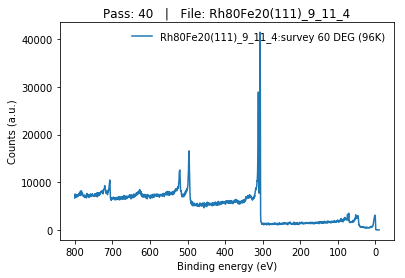

In [176]:
spectrum = all_spectra[175]
if not spectrum.isEmpty(): 
    region = spectrum.getRegion()
    print(region.getInfo("Sweeps Number"))
    region.normalizeBySweeps()
    region.invertToBinding()
    helpers.plotRegion(region, 
                       figure=1, 
                       y_data="counts", 
                       label=region.getID(), 
                       title=True)
else:
    print("Empty! Booo!")